MACHINE LEARNING MODELS 

In [12]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#Control display
pd.options.display.max_columns = 30
sns.set(style = "darkgrid" , rc = {'axes.facecolor':'#CAF1DE'})

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
df = pd.read_csv("heart_disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
"""
cp = chest pain
chol = cholesterol
trestbps = resting blood pressure
fbs = fasting blood sugar
restecg = resting electrocardiography
exang = exercise induced agina
aldpeak = ST depression induced
slope = the slope of the peak exercise 
ca = number of major vessel
thal =  

"""

#Logistic Regression
#Predict one or more possible outcomes(usually represented as 0 and 1)
#column targets
df.target.value_counts()


target
1    526
0    499
Name: count, dtype: int64

In [4]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


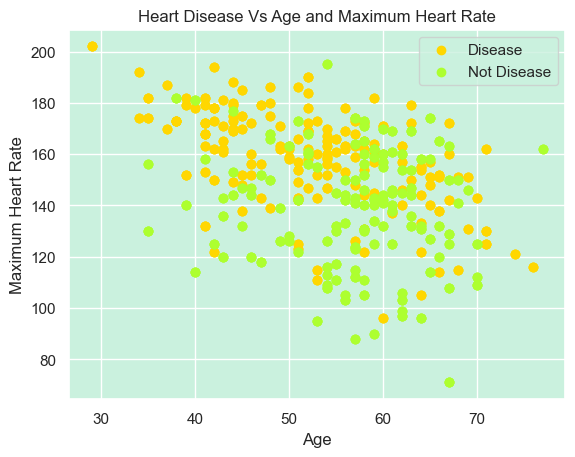

In [7]:
#Create a scatter plot for heart disease vs age 

# Create the scatter plot
plt.scatter(x = df.age[df.target == 1], y = df.thalach[df.target == 1], c='#FFD700', label='Disease')
plt.scatter(x = df.age[df.target == 0], y = df.thalach[df.target == 0], c='#ADFF2F', label='Not Disease')

#Add legend
plt.legend()

#Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

#Set the title of the scatter plot
plt.title('Heart Disease Vs Age and Maximum Heart Rate')
plt.show()

In [8]:
#create a LogisticRegression
#Help to solve problems with Classification
#Create the independent variables and dependent variables

y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [9]:
#Normalise the data 
x  = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [10]:
#split the data 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [11]:
#Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [15]:
#Get the accuracy using the LogisticRegression
#Getting the Test Accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100

accuracies['LogisticRegression'] =acc

#Get output
print('Test Accuracy {:.2f}'.format(acc))


Test Accuracy 72.68


In [16]:
#Getting accuracy score of the K-nearest neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2) # n_neighbors means k
knn.fit(x_train.T, y_train.T)
pred = knn.predict(x_test.T)

#Get output display 
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T) * 100))

2 NN Score: 95.12%


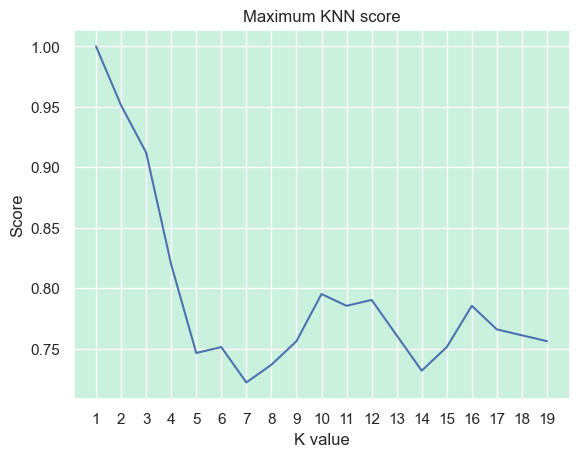

Maximum KNN score is 100.00


In [20]:
#Get Maximum KNN score for the model
score_list = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors= i) # Get n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))
    
#Show using line plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximum KNN score')
plt.show()

#Get maximum KNN score for the model in percentage
acc = max(score_list) * 100
accuracies['KNN'] = acc
print('Maximum KNN score is {:.2f}'.format(acc))

In [21]:
from sklearn.svm import SVC

svm = SVC (random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score (x_train.T, y_train.T) * 100
accuracies['SVM'] = acc

print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 70.24%


In [22]:
#Accuracy of Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc =nb.score (x_test.T, y_test.T) * 100
accuracies['Naive Bayes']= acc
print('Accuracy of Naive Bayes: {:.2f}%'.format(acc))

Accuracy of Naive Bayes: 85.37%


In [24]:
# Get accuracy using decision tree model 
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier() 
dtc.fit(x_train.T, y_train.T)

acc= dtc.score (x_test.T, y_test.T)* 100 
accuracies['Decision Tree'] = acc
print('Decision Tree Test Accuracy {:.2f}%'.format(acc))

Decision Tree Test Accuracy 100.00%


In [25]:
# Get accuracy of Random Forest Classification Algorithm 
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier (n_estimators = 1000, random_state = 1) 
rf.fit(x_train.T, y_train.T)

acc = rf.score (x_test.T, y_test.T) * 100 
accuracies['Random Forest'] = acc

print('Random Forest Alogrithm Accuracy Score: {:.2f}%'.format(acc))

Random Forest Alogrithm Accuracy Score: 100.00%


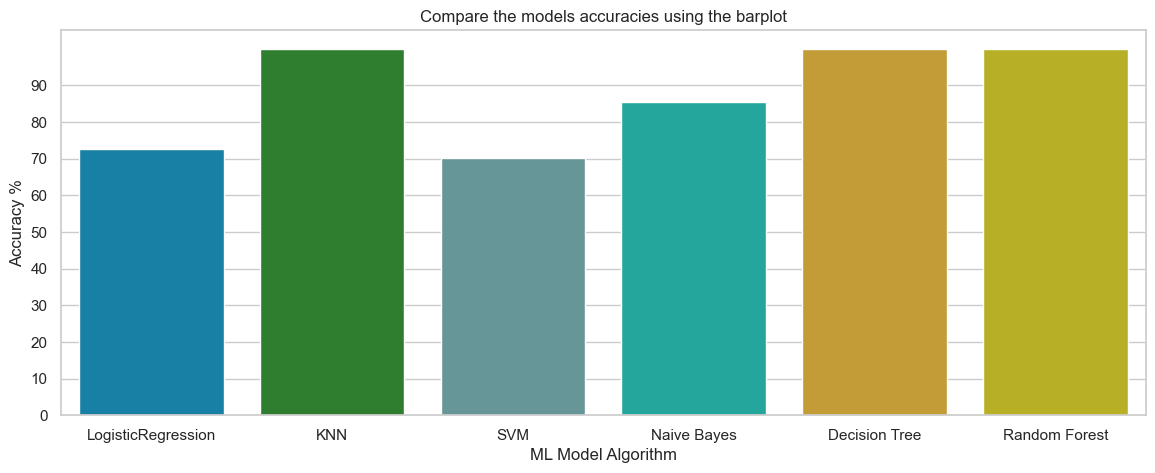

In [28]:
# Compare the models accuracies using the barplot from sns 
colors = ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E']

sns.set_style( 'whitegrid')
plt.figure(figsize=(14,5)) 
plt.yticks(np.arange(0, 100, 10))
plt.title('Compare the models accuracies using the barplot')
plt.ylabel('Accuracy %')
plt.xlabel('ML Model Algorithm')
sns.barplot(x=list (accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
# ML Confusion Matrix

# Evaluate the performance of a classification model Summary

"""
True Positive (TP): The number of instances correctly predicted as positive (correctly classified as the positive class). 
True Negative (TN): The number of instances correctly predicted as negative (correctly classified as the negative class). 
False Positive (FP): The number of instances incorrectly predicted as positive (incorrectly classified as the positive class).
False Negative (FN): The number of instances incorrectly predicted as negative (incorrectly classified as the negative class).
ROC Curve and AUC: ROC (Receiver Operating Characteristic) AUC (Area Under the Curve)
"""

In [29]:
# Get confusion matrices to look at the imbalance dataset

# Predicted values

y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier (n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T) 
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [30]:
# Import module for confusion matrix 
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)

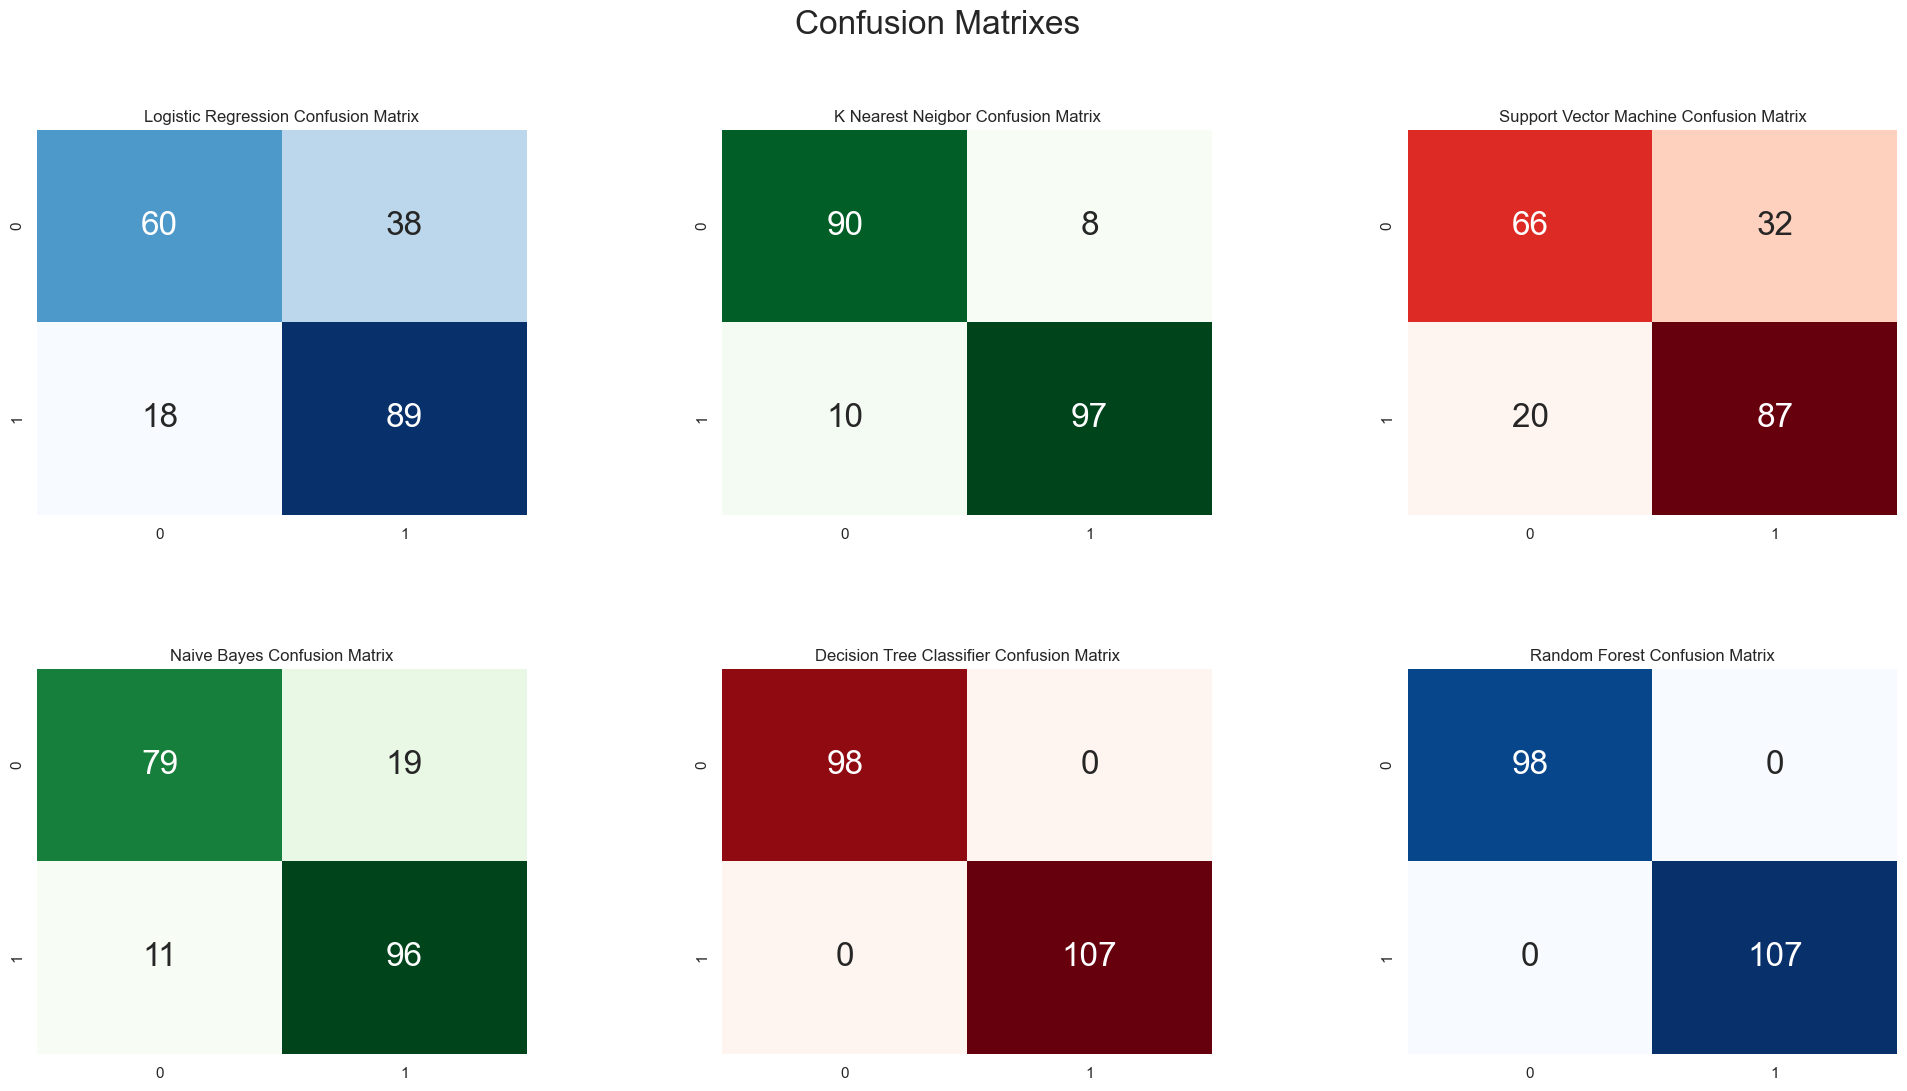

In [39]:
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrixes", fontsize=24) 
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

# Heatmap for "Logistic Regression Confusion Matrix"
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# Heatmap for K Nearest Neigbor Confusion Matrix
plt.subplot(2,3,2)
plt.title("K Nearest Neigbor Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size": 24})

# Heatmap for Support Vector Machine Confusion Matrix 
plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 24})

# Heatmap for Naive Bayes Confusion Matrix
plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb, annot=True,cmap="Greens", fmt="d", cbar=False, annot_kws={"size": 24})

# Heatmap for Decision Tree Classifier Confusion Matrix
plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 24})

# Heatmap for Random Forest Confusion Matrix
plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()